In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = "malgun gothic"
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

#### 학습결과 시각화 함수

In [4]:
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [5]:
def plot_accuracy(epochs, history):
    """
    학습 Accuracy를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], 
                                                 label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()  

#### 데이터 로딩

In [6]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [7]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [8]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

# 데이터 개수
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

#### 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류문제이므로)

In [9]:
X_train = (train_image/255.0).astype("float32")
X_test = (test_image/255.0).astype('float32')

In [10]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [11]:
#확인
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [12]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### Dataset 생성

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
                              .batch(N_BATCHS)

# 모델의 크기 변경

In [14]:
# 작은 모델
def create_small_model():
    #모델생성
    model = keras.Sequential()
    # 레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=8, activation='relu'))
    # 출력레이어
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [16]:
# 모델 생성, 컴파일
small_model =  create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
small_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


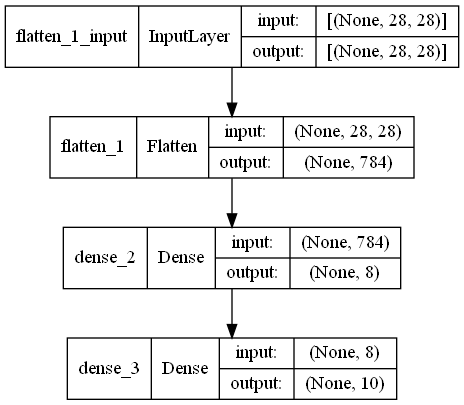

In [18]:
keras.utils.plot_model(small_model, show_shapes=True)

In [19]:
hist = small_model.fit(train_dataset, epochs=N_EPOCHS, 
                       validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.8624 - accuracy: 0.7400 - val_loss: 0.4291 - val_accuracy: 0.8833
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3977 - accuracy: 0.8875 - val_loss: 0.3442 - val_accuracy: 0.9017
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.9042 - val_loss: 0.3125 - val_accuracy: 0.9144
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3169 - accuracy: 0.9118 - val_loss: 0.3020 - val_accuracy: 0.9150
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.9155 - val_loss: 0.2940 - val_accuracy: 0.9194
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2942 - accuracy: 0.9181 - val_loss: 0.2935 - val_accuracy: 0.9176
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2881 - accuracy: 0.9201 - val_loss: 0.2869 - val_accuracy: 0.9199
Epoch 

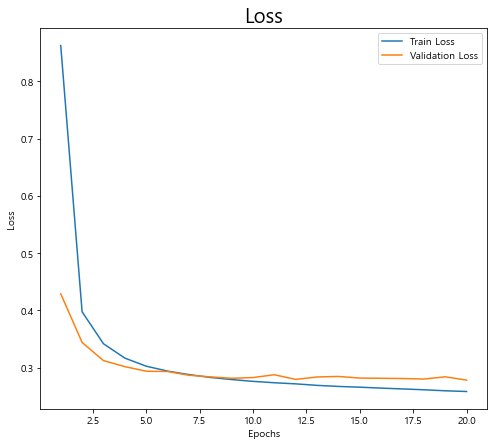

In [20]:
plot_loss(N_EPOCHS, hist)

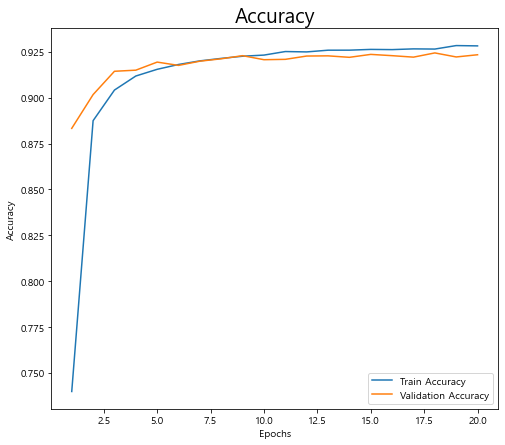

In [21]:
plot_accuracy(N_EPOCHS, hist)

In [23]:
# 모델의 크기를 크게
# MLP - units 개수 : 2제곱, 큰값에서 점점 줄여나간다.
def create_bigger_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [24]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [25]:
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [27]:
hist = bigger_model.fit(train_dataset, 
                        epochs=N_EPOCHS, 
                        validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 7s 9ms/step - loss: 0.2464 - accuracy: 0.9264 - val_loss: 0.1270 - val_accuracy: 0.9579
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0943 - accuracy: 0.9704 - val_loss: 0.0968 - val_accuracy: 0.9697
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0741 - val_accuracy: 0.9770
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0756 - val_accuracy: 0.9788
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0752 - val_accuracy: 0.9785


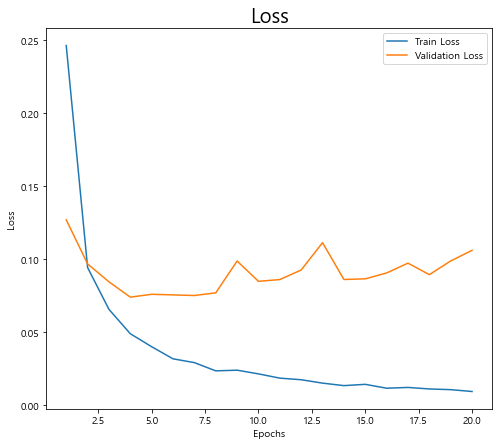

In [28]:
plot_loss(N_EPOCHS, hist)

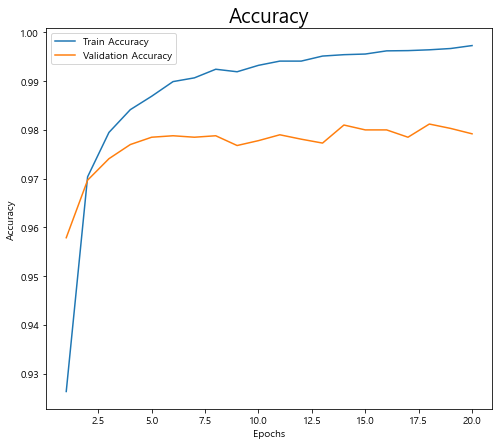

In [29]:
plot_accuracy(N_EPOCHS, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
- dropout node를 가질 Layer 앞에 추가.

In [30]:
def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(0.5))# 다음 레이이의 노드들중 일부를 dropout시킨다.
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [31]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [32]:
dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [33]:
hist = dropout_model.fit(train_dataset, 
                         epochs=N_EPOCHS, 
                         validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 9s 13ms/step - loss: 0.8342 - accuracy: 0.7234 - val_loss: 0.2370 - val_accuracy: 0.9308
Epoch 2/20
600/600 [==============================] - 8s 13ms/step - loss: 0.4392 - accuracy: 0.8707 - val_loss: 0.1782 - val_accuracy: 0.9478
Epoch 3/20
600/600 [==============================] - 9s 14ms/step - loss: 0.3633 - accuracy: 0.8942 - val_loss: 0.1522 - val_accuracy: 0.9573
Epoch 4/20
600/600 [==============================] - 9s 14ms/step - loss: 0.3216 - accuracy: 0.9068 - val_loss: 0.1363 - val_accuracy: 0.9613
Epoch 5/20
600/600 [==============================] - 8s 14ms/step - loss: 0.2960 - accuracy: 0.9143 - val_loss: 0.1231 - val_accuracy: 0.9637
Epoch 6/20
600/600 [==============================] - 9s 15ms/step - loss: 0.2778 - accuracy: 0.9192 - val_loss: 0.1090 - val_accuracy: 0.9671s - loss: 0.2787 - accuracy: 0.
Epoch 7/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2720 - accuracy: 0.9214 - val_los

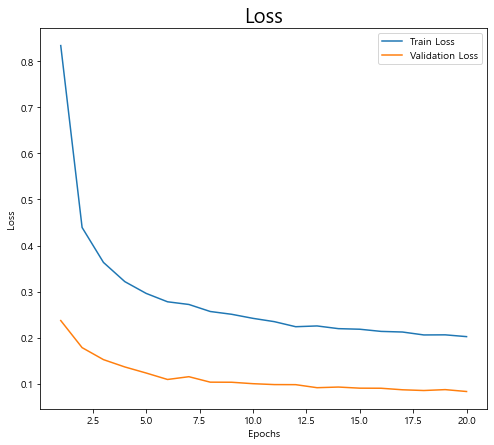

In [34]:
plot_loss(N_EPOCHS, hist)

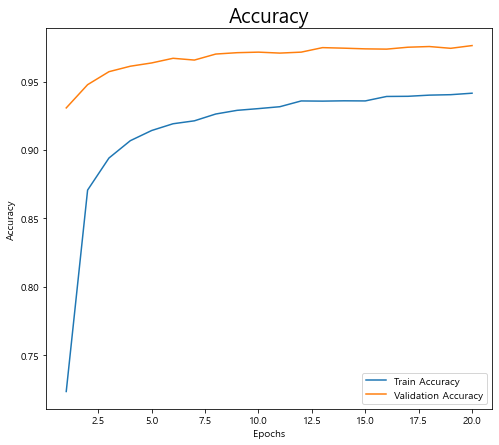

In [35]:
plot_accuracy(N_EPOCHS, hist)

## Batch Normalization
- Dense -> BN -> Activation  순서로 적용
- layers.BatchNormalization 사용

In [37]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256)) #unit만 지정하고 activation은 생략
    model.add(layers.BatchNormalization()) #BN
    model.add(layers.ReLU()) #Activation함수명이 Layer클래스 이름.
    
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # 출력
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model

In [ ]:
# layers.Activation(activation="sigmoid")

In [38]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [39]:
bn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [40]:
hist = bn_model.fit(train_dataset, epochs=N_EPOCHS,
                    validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 7s 9ms/step - loss: 0.4148 - accuracy: 0.9388 - val_loss: 0.2077 - val_accuracy: 0.9703
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1803 - accuracy: 0.9737 - val_loss: 0.1243 - val_accuracy: 0.9783
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1137 - accuracy: 0.9817 - val_loss: 0.0962 - val_accuracy: 0.9785
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0783 - accuracy: 0.9870 - val_loss: 0.0782 - val_accuracy: 0.9813
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0588 - accuracy: 0.9896 - val_loss: 0.0688 - val_accuracy: 0.9823
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0446 - accuracy: 0.9920 - val_loss: 0.0741 - val_accuracy: 0.9809
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0348 - accuracy: 0.9938 - val_loss: 0.0656 - val_accuracy: 0.9820
Epoch 

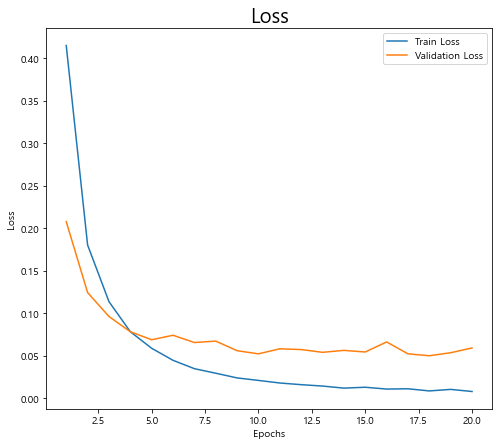

In [41]:
plot_loss(N_EPOCHS, hist)

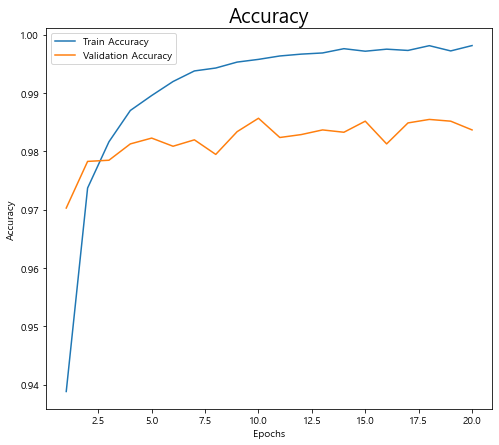

In [42]:
plot_accuracy(N_EPOCHS, hist)

## Learning Rate 조정을 이용한 성능향상

### Learning Rate Decay
- 일정한 step마다 Learning rate를 조정

In [43]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [44]:
model = create_model()

In [46]:
len(train_dataset)*10  #10에폭의 step수

6000

In [49]:
# optimizer의 learning_rate를 상수 대신 LearningRate스케쥴러객체로 설정한다.
# ExponentialDcay - 일정한 간격(step기준)마다 LR를 변경
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=LEARNING_RATE, #시작 LR
                    decay_steps=len(train_dataset)*5, #몇 스텝마다 변경할지 
                    decay_rate=0.5, #변화율 (이값을 현재LR에 곱해준다.)
                    staircase=True, # 계단식으로 변화시킨다. 
                                    # False: 점진적으로 step마다 조금씩 줄여나간다.
                    )

In [50]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
hist = model.fit(train_dataset, 
                 epochs=N_EPOCHS, 
                 validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.2545 - accuracy: 0.9246 - val_loss: 0.1365 - val_accuracy: 0.9567
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0965 - accuracy: 0.9708 - val_loss: 0.0811 - val_accuracy: 0.9749
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.0715 - val_accuracy: 0.9784
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.0752 - val_accuracy: 0.9779
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0651 - val_accuracy: 0.9819
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0642 - val_accuracy: 0.9823
Epoch 

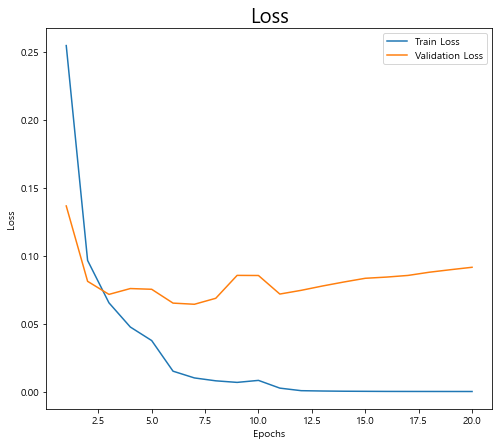

In [52]:
plot_loss(N_EPOCHS, hist)

### Callback 을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
    - 학습시 성능이 개선이 안되는 경우 LR를 조정

In [53]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss', #성능개선과 관련해 볼 평가지표
                          factor=0.5, # LR 조정 비율(현재 LR * factor)
                          patience=3, # 성능개선이 안될때 몇 epoch까지 기다려 볼지 지정(보통은 10정도 지정)
                          mode="min", # monitor의 값이 어떨때 성능개선되는지. (min-작을수록, max=클수록, auto-알아서 찾는다.)
                          verbose=2) # 학습률 변화시 로그 남기기.

In [55]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, 
                 validation_data=test_dataset,
                 callbacks=[lr_cb]) #학습때 처리할 callback들 등록

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2538 - accuracy: 0.9250 - val_loss: 0.1270 - val_accuracy: 0.9614 - lr: 0.0010s - loss: 0.2622 
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0958 - accuracy: 0.9707 - val_loss: 0.0896 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.0860 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0803 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0911 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0838 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 7/20
600/600 [==============================] -